# IMPORTS & FUNCTIONS

In [4]:
# IMPORTS
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.lines as mlines
import itertools, pickle
import seaborn as sns
sns.color_palette()
sns.set_theme()


In [25]:
# GLOBAL VARS
FREQ_X86 = 2600000000
FREQ_RISCV = 1200000000
NS_TO_S = 1000000000
datapath="data/java-test/jdk-11/"

In [71]:
def clean_lines(lines, f):
    benchmark_info = dict()
    first = True
    for l in lines:
        if first:
            first = False
        else:
            sl = l.split(",")
            aux = sl[0].split(".")
            name = aux[-1].replace('"',"")
            score = float(sl[4])*f/NS_TO_S
            benchmark_info[name] = score
            
    return benchmark_info

def remove(bench, remove):
    new_bench = dict()
    for k, v in bench.items():
        if k.replace('"',"") not in remove:
            new_bench[k] = v
    return new_bench

def get_ratio(d1, d2):
    ratio = list()
    for x1,x2 in zip(d1, d2):
        ratio.append(x1/x2)
    return ratio


# ANALYSIS

## Infrastructure Baseline Benchmark

In [72]:
x86path= datapath + "x86_64/jmh/openjdk-hotspot-vm/"
with open(x86path + 'InfrastructureBaselineBenchmark.csv') as x_baseline:
    lines_x_baseline = x_baseline.readlines()

x_baseline_benchmark = clean_lines(lines_x_baseline, FREQ_X86)

riscvpath= datapath + "riscv/jmh/openjdk-hotspot-vm/"
with open(riscvpath + 'InfrastructureBaselineBenchmark.csv') as r_baseline:
    lines_r_baseline = r_baseline.readlines()
    
r_baseline_benchmark = clean_lines(lines_r_baseline, FREQ_RISCV)           


In [73]:
x_baseline_benchmark = clean_lines(lines_x_baseline, FREQ_X86)
r_baseline_benchmark = clean_lines(lines_r_baseline, FREQ_RISCV)           

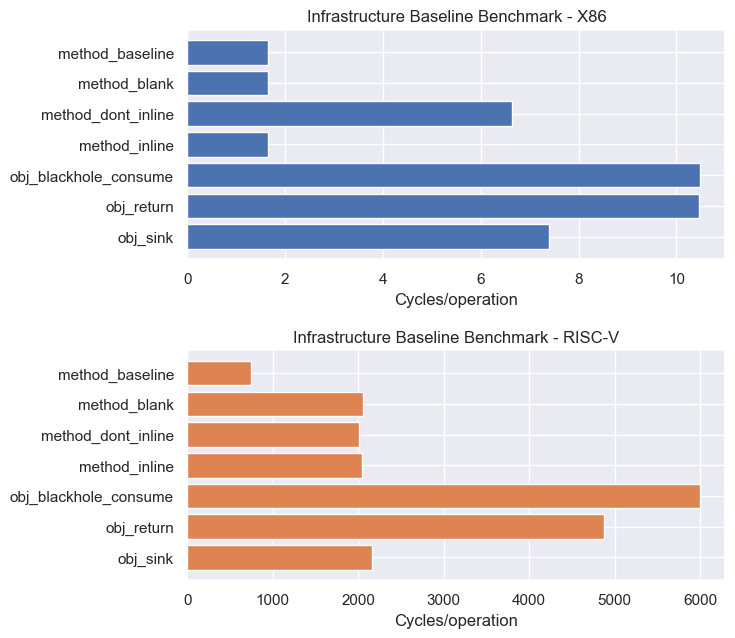

In [98]:
# Fixing random state for reproducibility
fig, ax = plt.subplots(2,1)
fig.set_figwidth(7)
fig.set_figheight(7)
fig.tight_layout(pad=3.5)

# Example data
benchmark = list(x_baseline_benchmark.keys())
y_pos = np.arange(len(benchmark))
performance = x_baseline_benchmark.values()

ax[0].barh(y_pos, performance, align='center')
ax[0].set_yticks(y_pos, labels=benchmark)
ax[0].invert_yaxis()  # labels read top-to-bottom
ax[0].set_xlabel('Cycles/operation')
ax[0].set_title('Infrastructure Baseline Benchmark - X86')

performance = r_baseline_benchmark.values()

c2 = sns.color_palette()[1]
ax[1].barh(y_pos, performance, align='center', color = c2)
ax[1].set_yticks(y_pos, labels=benchmark)
ax[1].invert_yaxis()  # labels read top-to-bottom
ax[1].set_xlabel('Cycles/operation')
ax[1].set_title('Infrastructure Baseline Benchmark - RISC-V')

plt.savefig('figures/jvm/baseline.png', bbox_inches='tight')

plt.show()


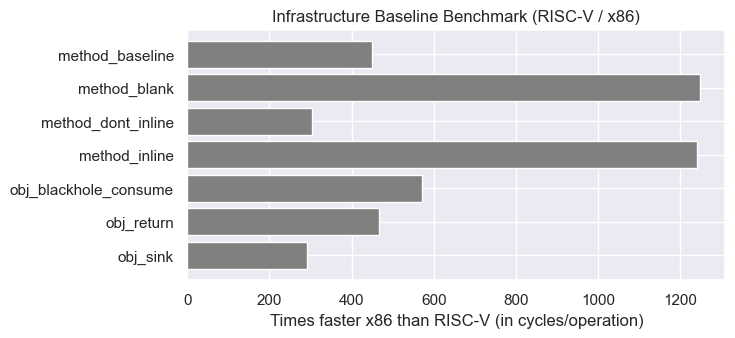

In [99]:
# Fixing random state for reproducibility
fig, ax = plt.subplots()
fig.set_figwidth(7)
fig.set_figheight(4)
fig.tight_layout(pad=3.5)

# Example data
benchmark = list(x_baseline_benchmark.keys())
y_pos = np.arange(len(benchmark))
performance = get_ratio(r_baseline_benchmark.values(), x_baseline_benchmark.values())

c2 = "grey"
ax.barh(y_pos, performance, align='center', color = c2)
ax.set_yticks(y_pos, labels=benchmark)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Times faster x86 than RISC-V (in cycles/operation)')
ax.set_title('Infrastructure Baseline Benchmark (RISC-V / x86)')

plt.savefig('figures/jvm/baseline_ratio.png', bbox_inches='tight')

plt.show()


## Canonicalize Induction Variable Benchmark

In [79]:
x86path = datapath + "x86_64/jmh/openjdk-hotspot-vm/"
with open(x86path + 'CanonicalizeInductionVariableBenchmark.csv') as x_induction:
    lines_x_induction = x_induction.readlines()

x_induction_benchmark = clean_lines(lines_x_induction, FREQ_X86)

riscvpath = datapath + "riscv/jmh/openjdk-hotspot-vm/"
with open(riscvpath + 'CanonicalizeInductionVariableBenchmark.csv') as r_induction:
    lines_r_induction = r_induction.readlines()

r_induction_benchmark = clean_lines(lines_r_induction, FREQ_RISCV)           


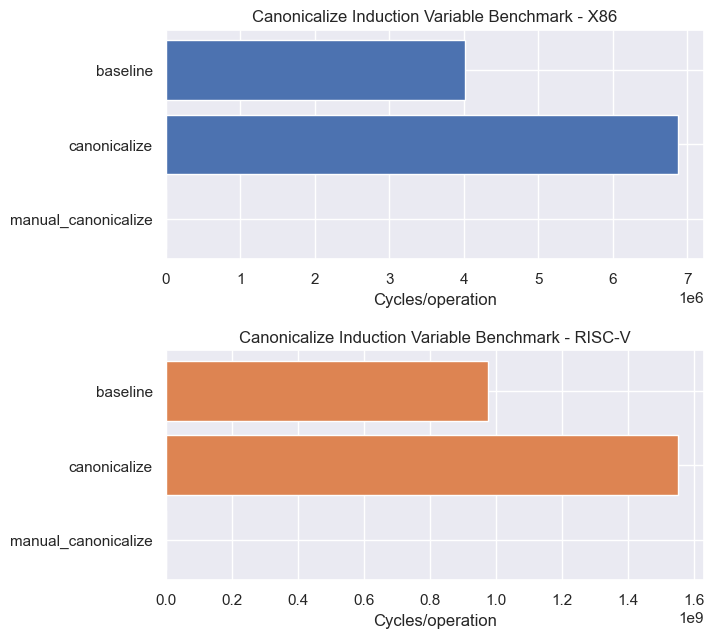

In [100]:
# Fixing random state for reproducibility
fig, ax = plt.subplots(2,1)
fig.set_figwidth(7)
fig.set_figheight(7)
fig.tight_layout(pad=3.5)

# Example data
benchmark = list(x_induction_benchmark.keys())
y_pos = np.arange(len(benchmark))
performance = x_induction_benchmark.values()

ax[0].barh(y_pos, performance, align='center')
ax[0].set_yticks(y_pos, labels=benchmark)
ax[0].invert_yaxis()  # labels read top-to-bottom
ax[0].set_xlabel('Cycles/operation')
ax[0].set_title('Canonicalize Induction Variable Benchmark - X86')

performance = r_induction_benchmark.values()

c2 = sns.color_palette()[1]
ax[1].barh(y_pos, performance, align='center', color = c2)
ax[1].set_yticks(y_pos, labels=benchmark)
ax[1].invert_yaxis()  # labels read top-to-bottom
ax[1].set_xlabel('Cycles/operation')
ax[1].set_title('Canonicalize Induction Variable Benchmark - RISC-V')

plt.savefig('figures/jvm/induction.png', bbox_inches='tight')

plt.show()


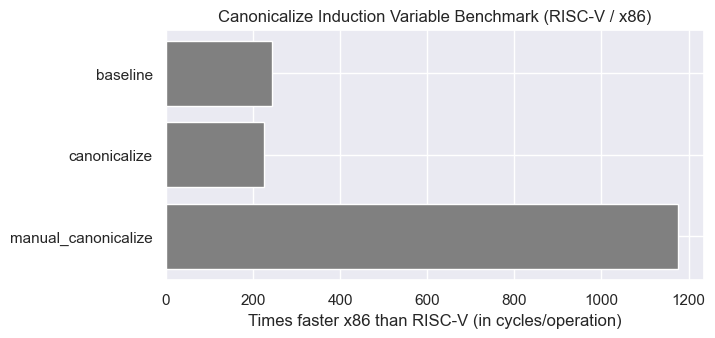

In [101]:
# Ratio
fig, ax = plt.subplots()
fig.set_figwidth(7)
fig.set_figheight(4)
fig.tight_layout(pad=3.5)

# Example data
benchmark = list(x_induction_benchmark.keys())
y_pos = np.arange(len(benchmark))
performance = get_ratio(r_induction_benchmark.values(), x_induction_benchmark.values())

c2 = "grey"
ax.barh(y_pos, performance, align='center', color = c2)
ax.set_yticks(y_pos, labels=benchmark)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Times faster x86 than RISC-V (in cycles/operation)')
ax.set_title('Canonicalize Induction Variable Benchmark (RISC-V / x86)')

plt.savefig('figures/jvm/induction_ratio.png', bbox_inches='tight')

plt.show()


## Dead Local Allocation Store Benchmark

In [82]:
x86path= datapath + "x86_64/jmh/openjdk-hotspot-vm/"
with open(x86path + 'DeadLocalAllocationStoreBenchmark.csv') as x_allocation:
    lines_x_allocation = x_allocation.readlines()

x_allocation_benchmark = remove(clean_lines(lines_x_allocation, FREQ_X86), ("rate", "norm", "count", "time")) 

riscvpath= datapath + "riscv/jmh/openjdk-hotspot-vm/"
with open(riscvpath + 'DeadLocalAllocationStoreBenchmark.csv') as r_allocation:
    lines_r_allocation = r_allocation.readlines()

r_allocation_benchmark = remove(clean_lines(lines_r_allocation, FREQ_RISCV), ("rate", "norm", "count", "time"))     


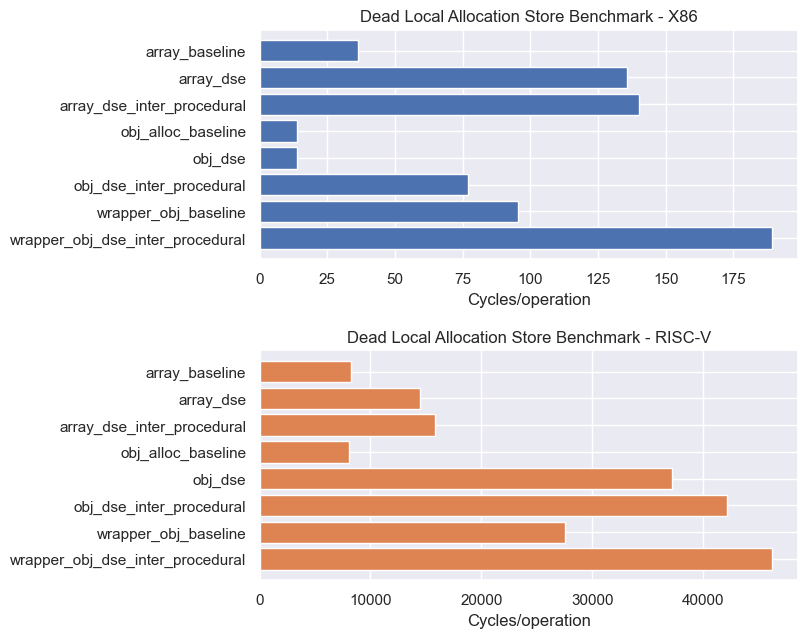

In [102]:
# Fixing random state for reproducibility
fig, ax = plt.subplots(2,1)
fig.set_figwidth(7)
fig.set_figheight(7)
fig.tight_layout(pad=3.5)

# Example data
benchmark = list(x_allocation_benchmark.keys())
y_pos = np.arange(len(benchmark))
performance = x_allocation_benchmark.values()

ax[0].barh(y_pos, performance, align='center')
ax[0].set_yticks(y_pos, labels=benchmark)
ax[0].invert_yaxis()  # labels read top-to-bottom
ax[0].set_xlabel('Cycles/operation')
ax[0].set_title('Dead Local Allocation Store Benchmark - X86')

performance = r_allocation_benchmark.values()

c2 = sns.color_palette()[1]
ax[1].barh(y_pos, performance, align='center', color = c2)
ax[1].set_yticks(y_pos, labels=benchmark)
ax[1].invert_yaxis()  # labels read top-to-bottom
ax[1].set_xlabel('Cycles/operation')
ax[1].set_title('Dead Local Allocation Store Benchmark - RISC-V')

plt.savefig('figures/jvm/allocation.png', bbox_inches='tight')

plt.show()

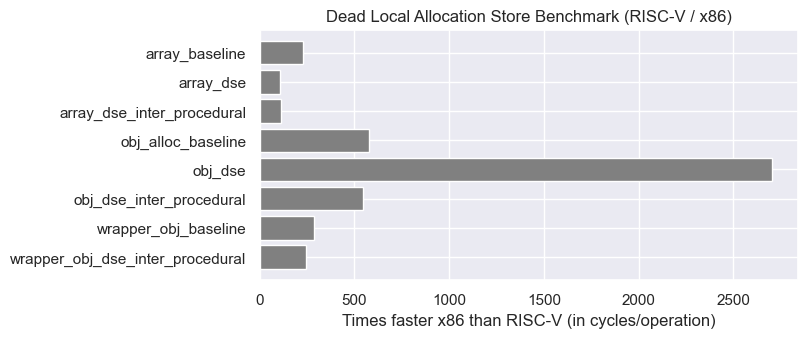

In [103]:
# Ratio
fig, ax = plt.subplots()
fig.set_figwidth(7)
fig.set_figheight(4)
fig.tight_layout(pad=3.5)

# Example data
benchmark = list(x_allocation_benchmark.keys())
y_pos = np.arange(len(benchmark))
performance = get_ratio(r_allocation_benchmark.values(), x_allocation_benchmark.values())

c2 = "grey"
ax.barh(y_pos, performance, align='center', color = c2)
ax.set_yticks(y_pos, labels=benchmark)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Times faster x86 than RISC-V (in cycles/operation)')
ax.set_title('Dead Local Allocation Store Benchmark (RISC-V / x86)')

plt.savefig('figures/jvm/allocation_ratio.png', bbox_inches='tight')

plt.show()
